In [70]:
import networkx as nx
import random
import numpy as np
from networkx.algorithms.community import modularity
from networkx.algorithms.community import greedy_modularity_communities

def create_directed_er_graph(num_nodes, num_edges):
    p = num_edges / (num_nodes * (num_nodes - 1))
    G = nx.erdos_renyi_graph(num_nodes, p, directed=True)
    while len(G.edges()) != num_edges:
        if len(G.edges()) < num_edges:
            u, v = random.sample(range(num_nodes), 2)
            G.add_edge(u, v)
        elif len(G.edges()) > num_edges:
            u, v = random.choice(list(G.edges()))
            G.remove_edge(u, v)
    
    return G

def calculate_modularity(G):
    communities = list(greedy_modularity_communities(G.to_undirected()))  # Treat directed graph as undirected for modularity
    mod = modularity(G.to_undirected(), communities)  # Calculate modularity based on the undirected version
    
    return mod

num_nodes = 24
num_samples = 20
res = {}
for i in range(1, (num_nodes*(num_nodes-1))):
    sample_res = [] 
    for _ in range(num_samples):
        G = create_directed_er_graph(num_nodes, i)
        mod = calculate_modularity(G)
        sample_res.append(mod)

    res.update({i: sum(sample_res)/len(sample_res)})

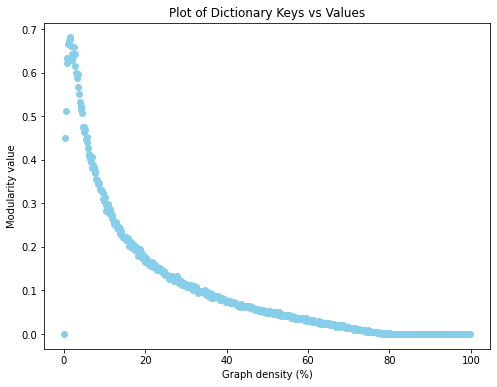

In [78]:
import matplotlib.pyplot as plt
keys = list(res.keys())
keys = [x/(num_nodes*(num_nodes-1)) * 100 for x in keys]
values = list(res.values())

plt.figure(figsize=(8, 6))
plt.scatter(keys, values, color='skyblue')
plt.xlabel('Graph density (%)')
plt.ylabel('Modularity value')
plt.title('Plot of Dictionary Keys vs Values')
plt.show()

In [75]:
values

[0.0,
 0.045,
 0.05111111111111112,
 0.06218749999999999,
 0.06340000000000001,
 0.06666666666666665,
 0.06729591836734694,
 0.06811224489795918,
 0.06765432098765431,
 0.06620000000000001,
 0.06289884705642282,
 0.06439178719008264,
 0.06385622123602894,
 0.06603640864629876,
 0.06439438775510205,
 0.06151076388888889,
 0.05983764838043061,
 0.0588915654769533,
 0.059682734278751835,
 0.05663173946684449,
 0.05517992639807538,
 0.05336561381439629,
 0.05245614898826053,
 0.05171958592845451,
 0.050869089581216866,
 0.04752358497698882,
 0.046409877590279314,
 0.047505694564043265,
 0.04683891111512058,
 0.044899083398718176,
 0.04520819544821702,
 0.044210011439284144,
 0.042726432865737,
 0.040777655437896784,
 0.04128988567906805,
 0.04025974730423147,
 0.03949977119701696,
 0.04074246490672674,
 0.03819143315928679,
 0.03882129534083777,
 0.03841294770320394,
 0.03693174391519434,
 0.037354610685826434,
 0.03565710575893787,
 0.03525917554671228,
 0.03479124816236249,
 0.0344508353